In [13]:
import torch
import torch.nn as nn

import nltk
from tokenization import Word_Preprocess

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from pathlib import Path

import seaborn as sns

import keras
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

import re
import string

In [4]:
disaster_tweet_data = pd.read_csv(r"C:\Users\Brand\project_env\PyTorch-Fundamentals\PyTorch Recurrent Neural Network\data\Disaster Tweet Dataset.csv")
disaster_tweet_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


<Axes: xlabel='target', ylabel='count'>

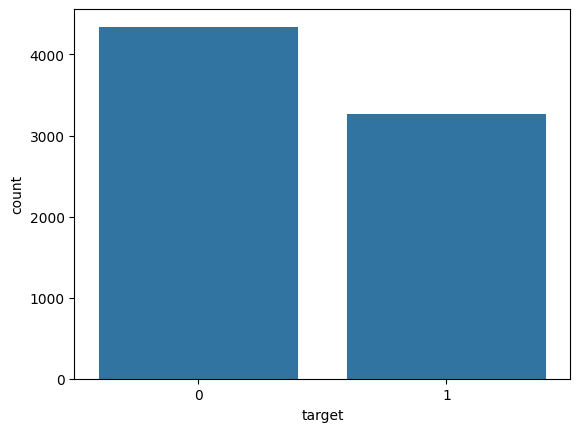

In [8]:
sns.barplot(disaster_tweet_data.target.value_counts())

In [9]:
word_processor = Word_Preprocess()
disaster_tweet_data.text = disaster_tweet_data.text.apply(word_processor.text_preprocess)

In [53]:
disaster_tweet_data.text[0]

'deeds reason earthquake may allah forgive us '

In [43]:
X = disaster_tweet_data.text
y = disaster_tweet_data.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [44]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

In [45]:
X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [46]:
vocab_length = len(word_tokenizer.word_index) + 1

In [47]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [48]:
embeddings_dictionary = {}
glove_file = open(r"C:\Users\Brand\project_env\PyTorch-Fundamentals\PyTorch Recurrent Neural Network\embedding weights\a2_glove.6B.100d.txt", encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [49]:
embedding_matrix = np.zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [78]:
snn_model = keras.Sequential()
embedding_layer = keras.layers.Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

snn_model.add(embedding_layer)
snn_model.add(keras.layers.Flatten())
snn_model.add(keras.layers.Dropout(0.2))
snn_model.add(keras.layers.Dense(1, activation='sigmoid'))

In [93]:
lstm_model = keras.Sequential()
embedding_layer = keras.layers.Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

lstm_model.add(embedding_layer)

lstm_model.add(keras.layers.Bidirectional(keras.layers.LSTM(64)))
lstm_model.add(keras.layers.Dropout(0.4))
lstm_model.add(keras.layers.Dense(1, activation='sigmoid'))

In [94]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(lstm_model.summary())

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, 100, 100)          1884300   
                                                                 
 bidirectional_6 (Bidirecti  (None, 128)               84480     
 onal)                                                           
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1968909 (7.51 MB)
Trainable params: 84609 (330.50 KB)
Non-trainable params: 1884300 (7.19 MB)
_________________________________________________________________
None


In [95]:
lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
77/77 [==============================] - 9s 71ms/step - loss: 0.5183 - acc: 0.7619 - val_loss: 0.4820 - val_acc: 0.7816
Epoch 2/10
77/77 [==============================] - 5s 58ms/step - loss: 0.4431 - acc: 0.8077 - val_loss: 0.4805 - val_acc: 0.7865
Epoch 3/10
77/77 [==============================] - 4s 57ms/step - loss: 0.4170 - acc: 0.8132 - val_loss: 0.4569 - val_acc: 0.7906
Epoch 4/10
77/77 [==============================] - 4s 57ms/step - loss: 0.4043 - acc: 0.8210 - val_loss: 0.4468 - val_acc: 0.7956
Epoch 5/10
77/77 [==============================] - 4s 55ms/step - loss: 0.3903 - acc: 0.8317 - val_loss: 0.4545 - val_acc: 0.8005
Epoch 6/10
77/77 [==============================] - 4s 54ms/step - loss: 0.3787 - acc: 0.8313 - val_loss: 0.4518 - val_acc: 0.7972
Epoch 7/10
77/77 [==============================] - 5s 61ms/step - loss: 0.3657 - acc: 0.8442 - val_loss: 0.4734 - val_acc: 0.7849
Epoch 8/10
77/77 [==============================] - 4s 56ms/step - loss: 0.3577 - a